# 1.problem statement

We are encouraged to build a predictive model to estimate and find out the sales of each product at different grocery stores/supermarkets.

Given a historical outlet sales data, the model will be trained and and learn in order to enable stakeholders to manage and plan more properly.

Firstly, we will apply some data cleaning and preprocessing, exploratory data analysis and feature engineering techniques, then build some machine learning models like Linear regression, Regularized linear regression, XGboost and Random forest.

Then, we go through the evaluation phase, where we compare betweeen the models results using accurate performane metrics like mean squared error.

Finally, we can choose our best model which we can deploy for dealing with this scenario.

# 2.Hypothesis generation

My hypothesis assumes that different product types and stores locations, sizes and year of establishment may have different sales patterns. For example, certain products may sell better in urban areas compared to rural areas, in larger stores compared to smaller ones or in older stores compared to newer ones. Also product type is crucial. For example, dairy products are likely purchased. By understanding these patterns, we can better optimize our sales and marketing strategies for each product and store location.

# 3.Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 4.Loading training dataset

In [2]:
df = pd.read_csv("C:\\Users\\Mazen\\Desktop\\Train.csv")
df.iloc[25:35]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800
27,DRJ59,11.650,low fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
31,NCS17,18.600,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
34,DRH01,17.500,Low Fat,0.097904,Soft Drinks,174.8738,OUT046,1997,Small,Tier 1,Supermarket Type1,2085.2856


# 5.Data structure and content

In [3]:
print(df.shape)

(8523, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 6.Data preprocessing

## 6.1.Handling outliers

In [5]:
def identify_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1- 2*IQR
    upper_bound = Q3+ 2*IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [6]:
outliers1 = identify_outliers('Item_Weight')
print(outliers1)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [7]:
outliers2 = identify_outliers('Item_Visibility')
print(outliers2)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
49             FDS02          NaN          Regular         0.255395   
83             NCL18          NaN          Low Fat         0.293418   
108            DRE60          NaN          low fat         0.278974   
174            FDI32         17.7          Low Fat         0.291865   
434            FDW27          NaN          Regular         0.264125   
...              ...          ...              ...              ...   
7949           FDK25          NaN          Regular         0.274592   
8194           FDY15          NaN          Regular         0.299098   
8215           FDZ16          NaN          Regular         0.279887   
8273           FDD14          NaN               LF         0.297313   
8345           FDY28          NaN          Regular         0.266397   

                  Item_Type  Item_MRP Outlet_Identifier  \
49                    Dairy  196.8794            OUT019   
83                Household  

In [8]:
outliers3 = identify_outliers('Item_MRP')
print(outliers3)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [9]:
outliers4 = identify_outliers('Item_Outlet_Sales')
print(outliers4)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
130            FDY25          NaN          Low Fat         0.033810   
304            DRE60        9.395          Low Fat         0.159658   
333            FDN58          NaN          Regular         0.056597   
373            FDX09        9.000          Low Fat         0.065237   
456            FDS26          NaN          Low Fat         0.089036   
...              ...          ...              ...              ...   
7752           FDC17          NaN          Low Fat         0.015386   
7826           FDM39          NaN          Low Fat         0.053212   
7930           FDP15          NaN          Low Fat         0.083536   
8039           FDY55       16.750          Low Fat         0.081485   
8201           FDO03          NaN          Regular         0.036704   

                  Item_Type  Item_MRP Outlet_Identifier  \
130                  Canned  180.5976            OUT027   
304             Soft Drinks  

In [10]:
print(df.iloc[49])
print('=======================================================================')

Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
minimum = Q1 - 2*IQR
maximum = Q3 + 2*IQR
df_without_outliers = df[(df['Item_Visibility'] >= minimum) & (df['Item_Visibility'] <= maximum)]
mean = df_without_outliers.mean()[1]
df['Item_Visibility'] = np.where((df['Item_Visibility'] < minimum) | (df['Item_Visibility'] > maximum), mean, df['Item_Visibility'])

print(df.iloc[49])

Item_Identifier                      FDS02
Item_Weight                            NaN
Item_Fat_Content                   Regular
Item_Visibility                   0.255395
Item_Type                            Dairy
Item_MRP                          196.8794
Outlet_Identifier                   OUT019
Outlet_Establishment_Year             1985
Outlet_Size                          Small
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                 780.3176
Name: 49, dtype: object
Item_Identifier                      FDS02
Item_Weight                            NaN
Item_Fat_Content                   Regular
Item_Visibility                   0.064172
Item_Type                            Dairy
Item_MRP                          196.8794
Outlet_Identifier                   OUT019
Outlet_Establishment_Year             1985
Outlet_Size                          Small
Outlet_Location_Type                Tier 1
Outlet_Type                  G

C:\Users\Mazen\AppData\Local\Temp/ipykernel_15560/4270008305.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_without_outliers.mean()[1]


In [11]:
print(df.iloc[130])
print('=======================================================================')

Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
minimum = Q1 - (2*IQR)
maximum = Q3 + (2*IQR)
df_without_outliers = df[(df['Item_Outlet_Sales'] >= minimum) & (df['Item_Outlet_Sales'] <= maximum)]
mean = df_without_outliers.mean()[4]
df['Item_Outlet_Sales'] = np.where((df['Item_Outlet_Sales'] < minimum) | (df['Item_Outlet_Sales'] > maximum), mean, df['Item_Outlet_Sales'])

print(df.iloc[130])

Item_Identifier                          FDY25
Item_Weight                                NaN
Item_Fat_Content                       Low Fat
Item_Visibility                        0.03381
Item_Type                               Canned
Item_MRP                              180.5976
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                    7968.2944
Name: 130, dtype: object
Item_Identifier                          FDY25
Item_Weight                                NaN
Item_Fat_Content                       Low Fat
Item_Visibility                        0.03381
Item_Type                               Canned
Item_MRP                              180.5976
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                        

C:\Users\Mazen\AppData\Local\Temp/ipykernel_15560/4242737014.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_without_outliers.mean()[4]


## 6.2.Handling missing values

In [12]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [13]:
df.fillna(df.mean(), inplace=True)

C:\Users\Mazen\AppData\Local\Temp/ipykernel_15560/820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [14]:
mode_value = df['Outlet_Size'].mode()[0]
print(mode_value)
df['Outlet_Size'].fillna(value=mode_value, inplace=True)

Medium


In [15]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


## 6.3.Handling duplicates

In [16]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.064172,140.992782,1997.831867,2128.841408
std,4.226124,0.047490,62.275067,8.371760,1598.664007
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.092984,185.643700,2004.000000,3056.022000
max,21.350000,0.228993,266.888400,2009.000000,7602.104400


## 6.4.Normalization

In [18]:
df['Item_Weight'] = (df['Item_Weight'] - df['Item_Weight'].min()) / (df['Item_Weight'].max() - df['Item_Weight'].min())
df['Item_Visibility'] = (df['Item_Visibility'] - df['Item_Visibility'].min()) / (df['Item_Visibility'].max() - df['Item_Visibility'].min())
df['Item_MRP'] = (df['Item_MRP'] - df['Item_MRP'].min()) / (df['Item_MRP'].max() - df['Item_MRP'].min())

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.494352,0.280238,0.465635,1997.831867,2128.841408
std,0.251630,0.207386,0.264327,8.371760,1598.664007
min,0.000000,0.000000,0.000000,1985.000000,33.290000
25%,0.283120,0.117862,0.265437,1987.000000,834.247400
50%,0.494352,0.235513,0.474209,1999.000000,1794.331000
75%,0.681453,0.406056,0.655156,2004.000000,3056.022000
max,1.000000,1.000000,1.000000,2009.000000,7602.104400


## 6.5.Dropping unnecessary columns

In [20]:
columns_to_drop = ['Item_Identifier', 'Outlet_Identifier']
df.drop(columns_to_drop, axis=1, inplace=True)

In [21]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,Low Fat,0.070078,Dairy,0.927507,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,0.081274,Regular,0.084187,Soft Drinks,0.072068,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,0.770765,Low Fat,0.073190,Meat,0.468288,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,1998,Medium,Tier 3,Grocery Store,732.3800
4,0.260494,Low Fat,0.000000,Household,0.095805,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,Low Fat,0.247970,Snack Foods,0.777729,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,0.227746,Regular,0.205170,Baking Goods,0.326263,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,0.359929,Low Fat,0.153656,Health and Hygiene,0.228492,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,0.158083,Regular,0.634170,Snack Foods,0.304939,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 7.Univariate analysis

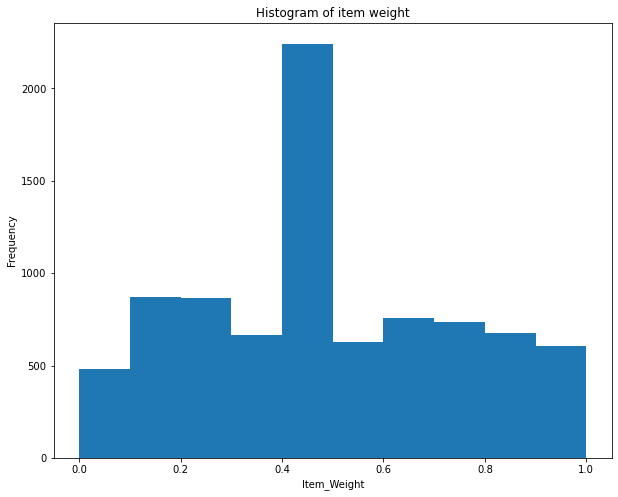

In [22]:
# Plot a histogram of item weight
plt.figure(figsize=(10, 8))
plt.hist(df['Item_Weight'], bins=10)
plt.title('Histogram of item weight')
plt.xlabel('Item_Weight')
plt.ylabel('Frequency')
plt.show()

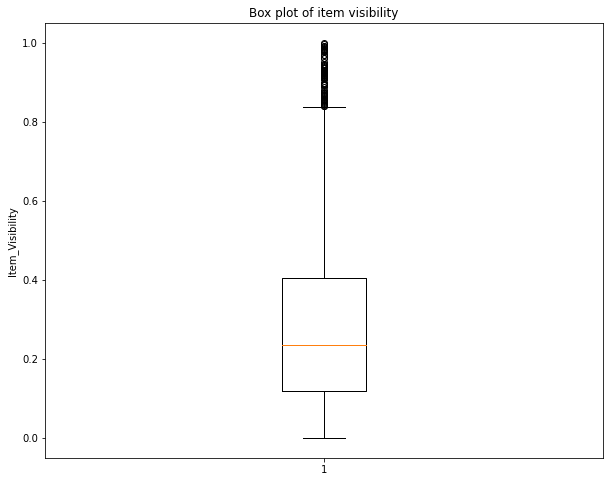

In [23]:
# Plot a box plot of item visibility
plt.figure(figsize=(10, 8))
plt.boxplot(df['Item_Visibility'])
plt.title('Box plot of item visibility')
plt.ylabel('Item_Visibility')
plt.show()

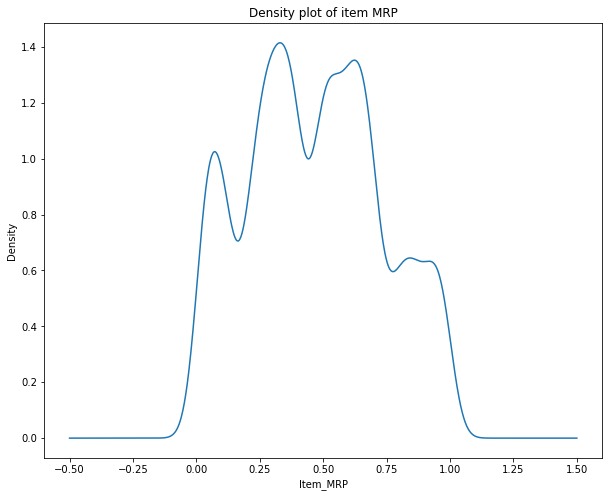

In [24]:
# Plot a density plot of item MRP
plt.figure(figsize=(10, 8))
plt.title('Density plot of item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Density')
df['Item_MRP'].plot(kind='density')
plt.show()

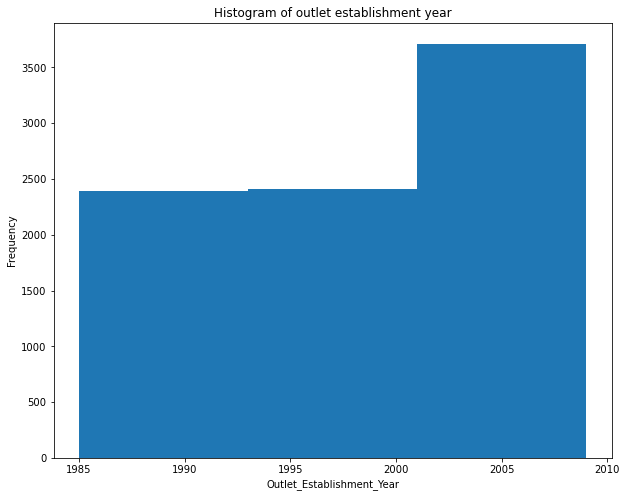

In [25]:
# Plot a histogram of outlet_establishment_year
plt.figure(figsize=(10, 8))
plt.hist(df['Outlet_Establishment_Year'], bins=3)
plt.title('Histogram of outlet establishment year')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Frequency')
plt.show()

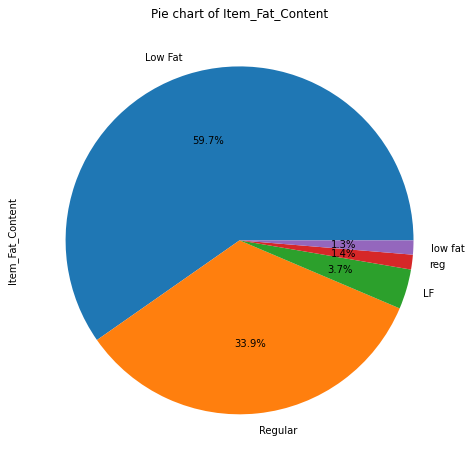

In [26]:
#pie chart for item_fat_content
plt.figure(figsize=(10, 8))
plt.title('Pie chart of Item_Fat_Content')
df['Item_Fat_Content'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [27]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

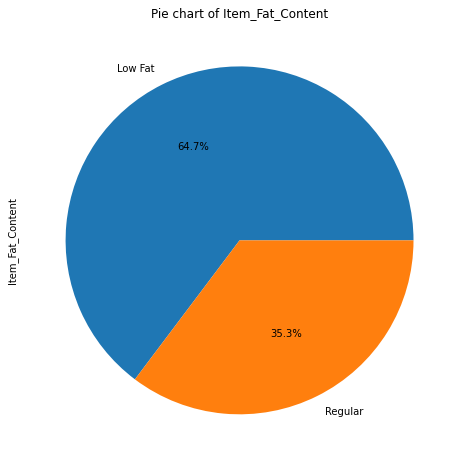

In [28]:
#pie chart for item_fat_content
plt.figure(figsize=(10, 8))
plt.title('Pie chart of Item_Fat_Content')
df['Item_Fat_Content'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

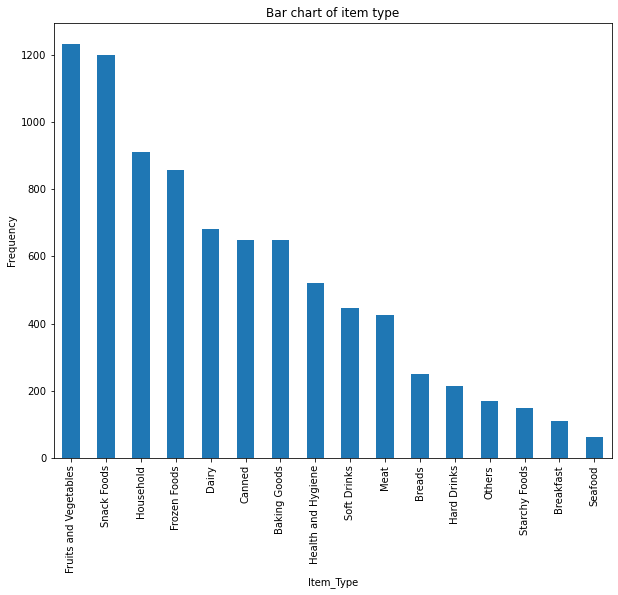

In [29]:
#bar chart for item type
plt.figure(figsize=(10, 8))
plt.title('Bar chart of item type')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
df['Item_Type'].value_counts().plot(kind='bar')
plt.show()

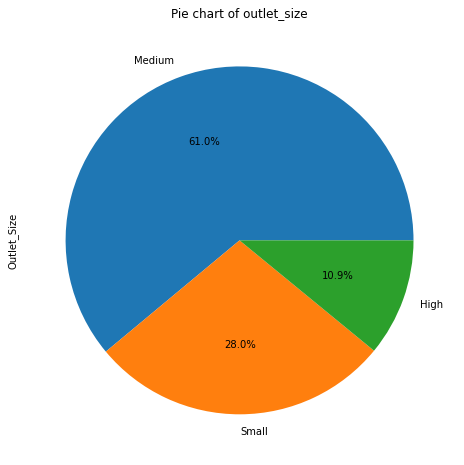

In [30]:
#pie chart for outlet_size
plt.figure(figsize=(10, 8))
plt.title('Pie chart of outlet_size')
df['Outlet_Size'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

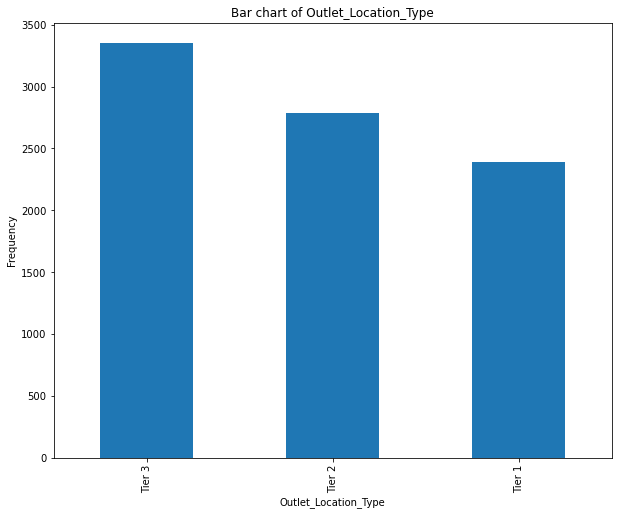

In [31]:
#bar chart for Outlet_Location_Type
plt.figure(figsize=(10, 8))
plt.title('Bar chart of Outlet_Location_Type')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Frequency')
df['Outlet_Location_Type'].value_counts().plot(kind='bar')
plt.show()

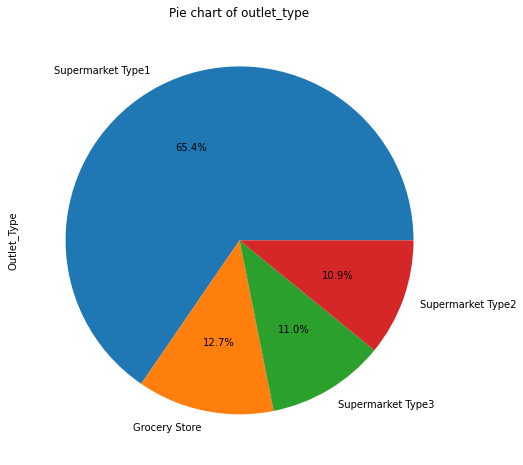

In [32]:
#pie chart for outlet_type
plt.figure(figsize=(10, 8))
plt.title('Pie chart of outlet_type')
df['Outlet_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [33]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,Low Fat,0.070078,Dairy,0.927507,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,0.081274,Regular,0.084187,Soft Drinks,0.072068,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,0.770765,Low Fat,0.073190,Meat,0.468288,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,1998,Medium,Tier 3,Grocery Store,732.3800
4,0.260494,Low Fat,0.000000,Household,0.095805,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,Low Fat,0.247970,Snack Foods,0.777729,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,0.227746,Regular,0.205170,Baking Goods,0.326263,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,0.359929,Low Fat,0.153656,Health and Hygiene,0.228492,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,0.158083,Regular,0.634170,Snack Foods,0.304939,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 8.Bivariate analysis

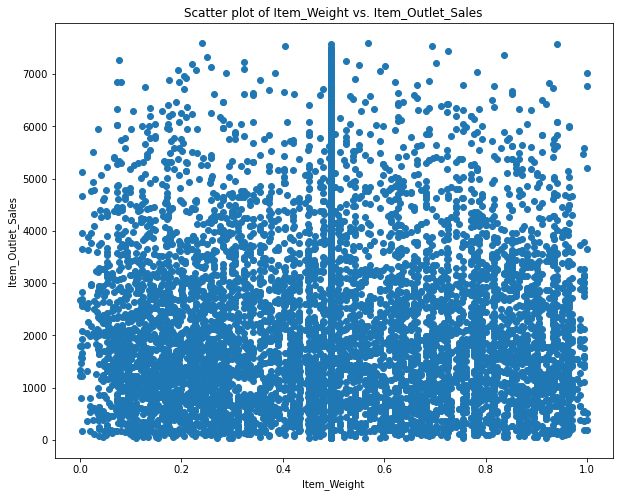

In [34]:
# Plot a scatter plot of item weight vs item outlet sales
plt.figure(figsize=(10, 8))
plt.title('Scatter plot of ' + 'Item_Weight' + ' vs. ' + 'Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.show()

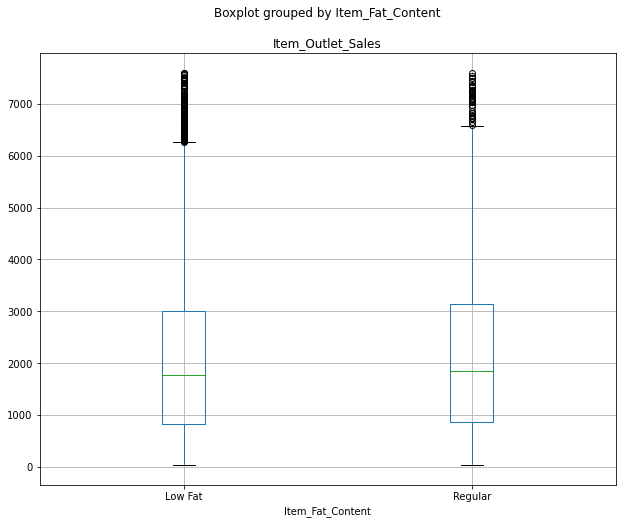

In [35]:
# Plot a box plot of item_outlet_sales for each category in item_fat_content
df.boxplot(column='Item_Outlet_Sales', by='Item_Fat_Content', figsize=(10,8))
plt.show()

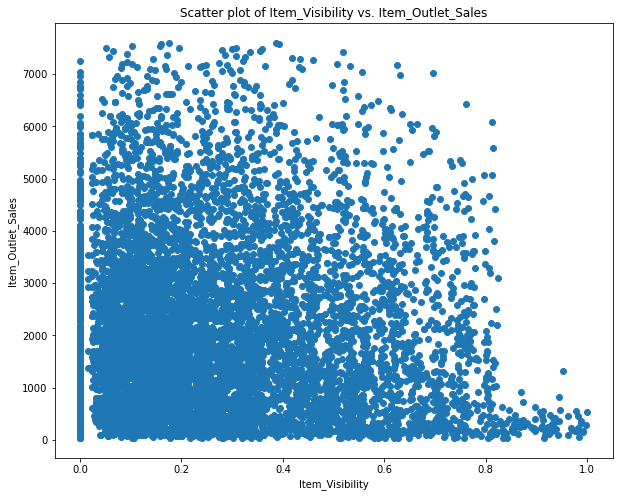

In [36]:
# Plot a scatter plot of item visibility vs item outlet sales
plt.figure(figsize=(10, 8))
plt.title('Scatter plot of ' + 'Item_Visibility' + ' vs. ' + 'Item_Outlet_Sales')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'])
plt.show()

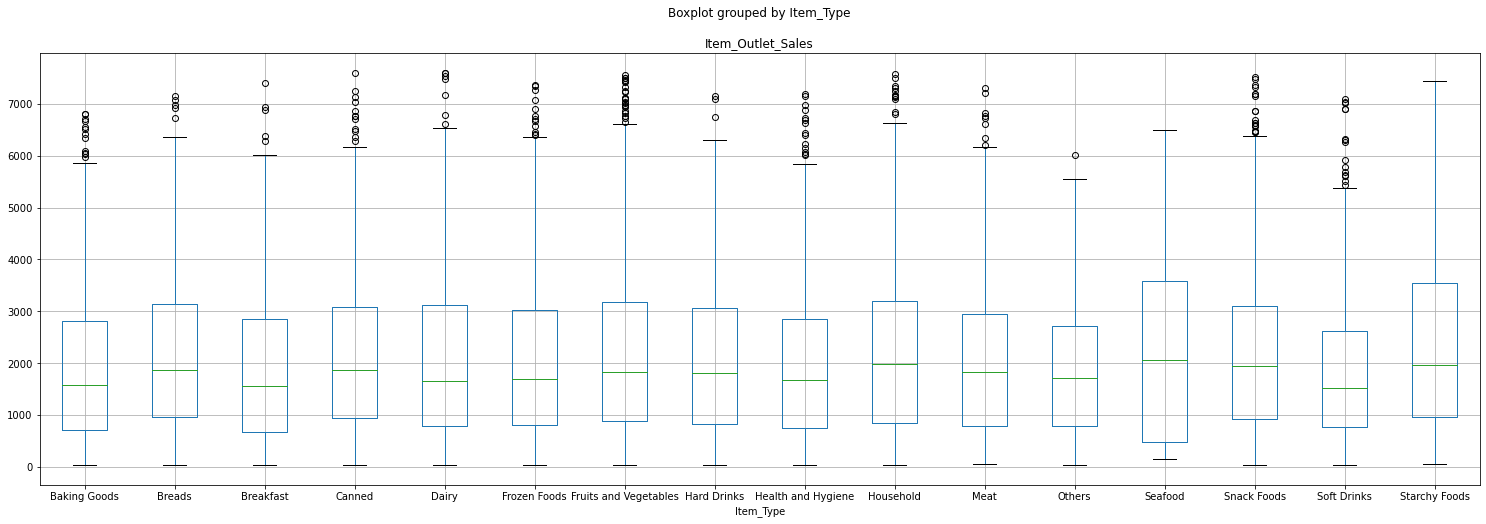

In [37]:
# Plot a box plot of item_outlet_sales for each category in item_type
df.boxplot(column='Item_Outlet_Sales', by='Item_Type', figsize=(25,8))
plt.show()

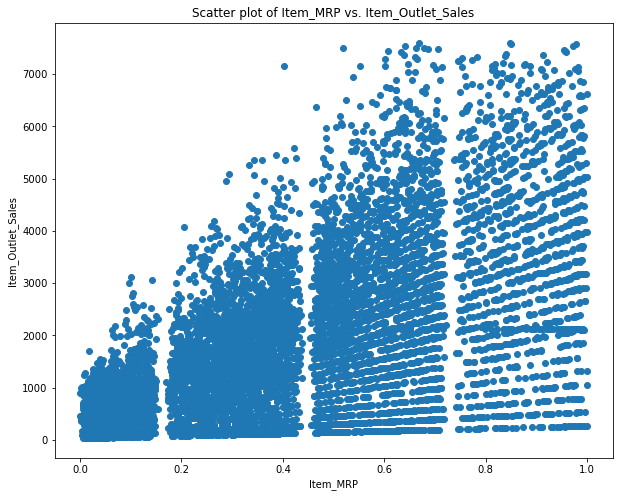

In [38]:
# Plot a scatter plot of item MRP vs item outlet sales
plt.figure(figsize=(10, 8))
plt.title('Scatter plot of ' + 'Item_MRP' + ' vs. ' + 'Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.show()

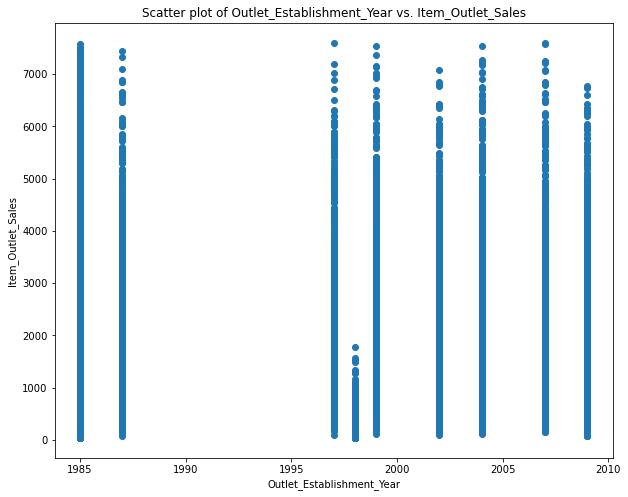

In [39]:
# Plot a scatter plot of outlet_establishment_year vs item outlet sales
plt.figure(figsize=(10, 8))
plt.title('Scatter plot of ' + 'Outlet_Establishment_Year' + ' vs. ' + 'Item_Outlet_Sales')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.scatter(df['Outlet_Establishment_Year'], df['Item_Outlet_Sales'])
plt.show()

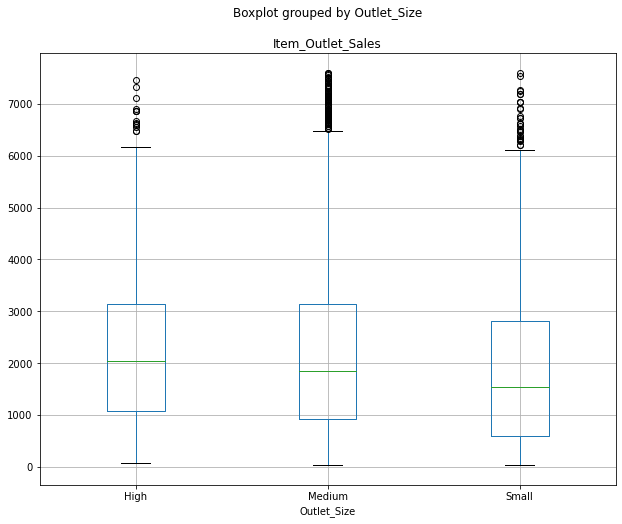

In [40]:
# Plot a box plot of item_outlet_sales for each category in Outlet_Size
df.boxplot(column='Item_Outlet_Sales', by='Outlet_Size', figsize=(10,8))
plt.show()

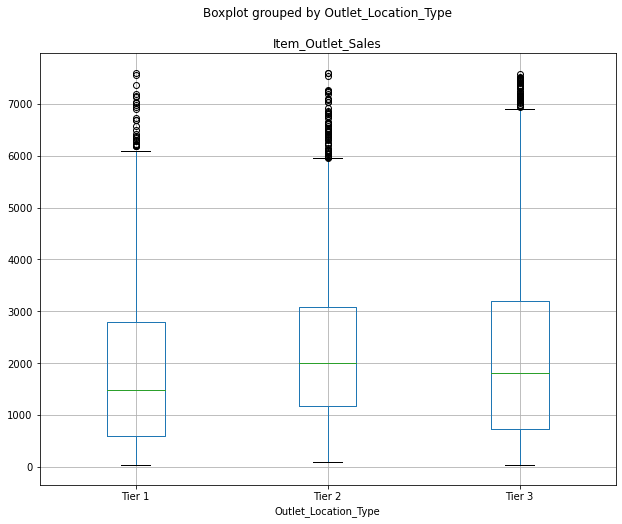

In [41]:
# Plot a box plot of item_outlet_sales for each category in Outlet_Location_Type
df.boxplot(column='Item_Outlet_Sales', by='Outlet_Location_Type', figsize=(10,8))
plt.show()

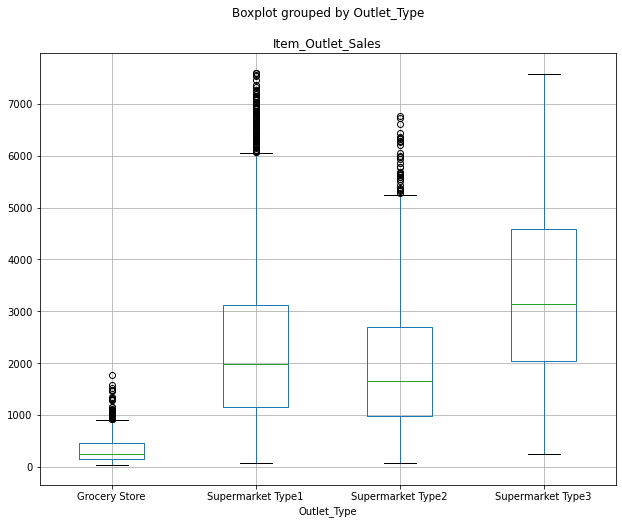

In [42]:
# Plot a box plot of item_outlet_sales for each category in Outlet_Type
df.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', figsize=(10,8))
plt.show()

In [43]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,Low Fat,0.070078,Dairy,0.927507,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,0.081274,Regular,0.084187,Soft Drinks,0.072068,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,0.770765,Low Fat,0.073190,Meat,0.468288,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,1998,Medium,Tier 3,Grocery Store,732.3800
4,0.260494,Low Fat,0.000000,Household,0.095805,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,Low Fat,0.247970,Snack Foods,0.777729,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,0.227746,Regular,0.205170,Baking Goods,0.326263,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,0.359929,Low Fat,0.153656,Health and Hygiene,0.228492,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,0.158083,Regular,0.634170,Snack Foods,0.304939,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 9.Encoding categorical variables

## 9.1.Onehot encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['Item_Fat_Content', 'Item_Type']

onehot = OneHotEncoder(sparse=False)

onehot.fit(df[columns_to_encode])

onehot_encoded = onehot.transform(df[columns_to_encode])

onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot.get_feature_names(columns_to_encode))

df = pd.concat([df, onehot_encoded_df], axis=1)

df = df.drop(columns_to_encode, axis=1)

In [45]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.282525,0.070078,0.927507,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,0.084187,0.072068,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.073190,0.468288,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.871986,0.000000,0.640093,1998,Medium,Tier 3,Grocery Store,732.3800,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,1987,High,Tier 3,Supermarket Type1,994.7052,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.247970,0.777729,1987,High,Tier 3,Supermarket Type1,2778.3834,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,0.227746,0.205170,0.326263,2002,Medium,Tier 2,Supermarket Type1,549.2850,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,0.359929,0.153656,0.228492,2004,Small,Tier 2,Supermarket Type1,1193.1136,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,0.158083,0.634170,0.304939,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 9.2.Label encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

label_encoder = LabelEncoder()

df[columns_to_encode] = df[columns_to_encode].apply(label_encoder.fit_transform)

In [47]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.282525,0.070078,0.927507,1999,1,0,1,3735.1380,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,0.084187,0.072068,2009,1,2,2,443.4228,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.073190,0.468288,1999,1,0,1,2097.2700,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.871986,0.000000,0.640093,1998,1,2,0,732.3800,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,1987,0,2,1,994.7052,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.247970,0.777729,1987,0,2,1,2778.3834,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,0.227746,0.205170,0.326263,2002,1,1,1,549.2850,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,0.359929,0.153656,0.228492,2004,2,1,1,1193.1136,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,0.158083,0.634170,0.304939,2009,1,2,2,1845.5976,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 10.Feature engineering

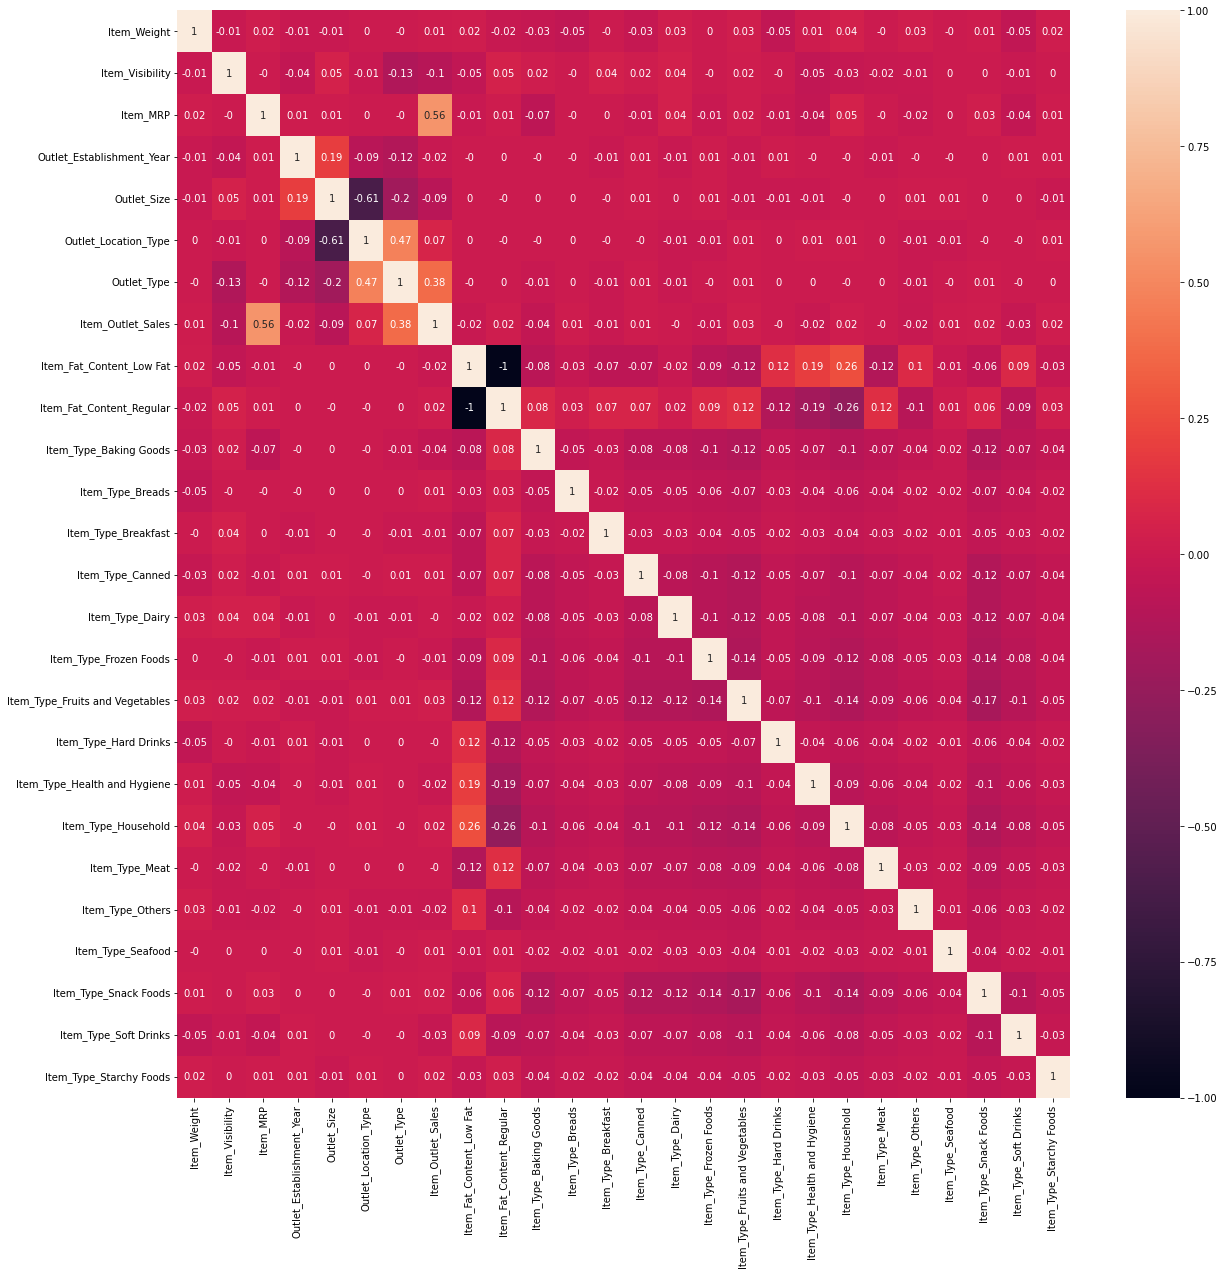

In [48]:
import seaborn as sns

#Show the correlation between variables
cor = df.corr().round(2)
plt.figure(figsize=(20,20))
sns.heatmap(data=cor,annot=True) #sns: seaborn
plt.show()

#The features, 'Item_MRP' and 'Outlet_Type', give us quantitative information about each data point.

# 11.Modelling

In [49]:
Y = df['Item_Outlet_Sales'] 
X = df.drop(['Item_Outlet_Sales'], axis = 1)

In [50]:
X_new=df[['Item_MRP','Outlet_Type']]
X_new

,Item_MRP,Outlet_Type
0,0.927507,1
1,0.072068,2
2,0.468288,1
3,0.640093,0
4,0.095805,1
...,...,...
8518,0.777729,1
8519,0.326263,1
8520,0.228492,1
8521,0.304939,2


In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
 
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y, test_size = 0.2, random_state=5, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6818, 2)
(1705, 2)
(6818,)
(1705,)


## 11.1.Linear regression with selected features

In [52]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train) 

LinearRegression()

In [53]:
y_pred = regr.predict(X_test)
print(len(y_pred))

1705


In [54]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regr_mse = mean_squared_error(Y_test, y_pred)
print('r2 socre = ',r2_score(Y_test,y_pred))
print('mean_sqrd_error is= ',regr_mse)
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))

r2 socre =  0.4367578903799738
mean_sqrd_error is=  1425938.9285786224
root_mean_squared error=  1194.126847775655


In [55]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
2095,1231.7300,1720.819100
3271,119.1782,909.248928
5055,1030.6584,761.908428
8307,1201.7690,835.100716
1923,719.0640,2547.189667
...,...,...
2079,525.3162,1692.990831
4490,402.8090,1121.286844
477,165.7842,1534.578584
1897,972.0680,676.309011


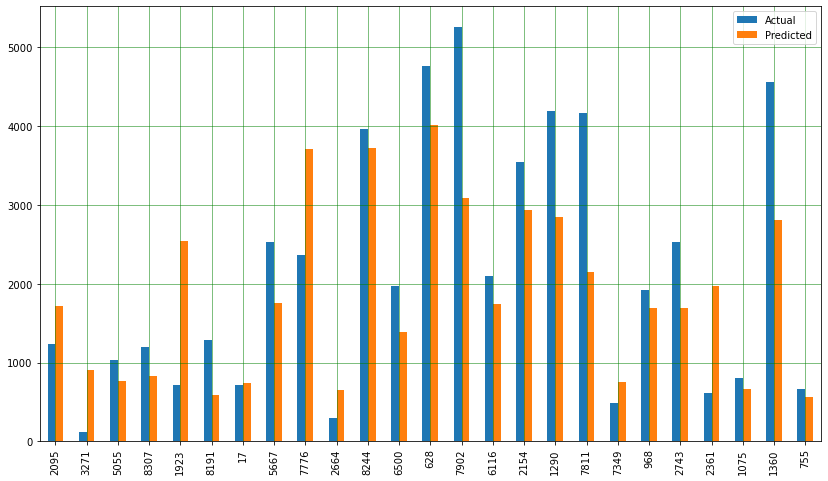

In [56]:
#Create a bar char for visualisation of results
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')# display grid lines for clarity

plt.show()

## 11.2.Linear regression with all features

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=5, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6818, 25)
(1705, 25)
(6818,)
(1705,)


In [58]:
regr_all = LinearRegression()
regr_all.fit(X_train, Y_train)

LinearRegression()

In [59]:
y_pred = regr_all.predict(X_test)
print(len(y_pred))

1705


In [60]:
regr_all_mse = mean_squared_error(Y_test, y_pred)

print('r2 socre = ',r2_score(Y_test,y_pred))
print('mean_sqrd_error is= ',regr_all_mse)
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))

r2 socre =  0.46375078746038045
mean_sqrd_error is=  1357602.0232147207
root_mean_squared error=  1165.1618013026005


In [61]:
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
2095,1231.7300,1629.143386
3271,119.1782,289.520995
5055,1030.6584,778.689056
8307,1201.7690,934.043439
1923,719.0640,2577.778282
...,...,...
2079,525.3162,1226.299191
4490,402.8090,897.531333
477,165.7842,1016.307979
1897,972.0680,1236.470734


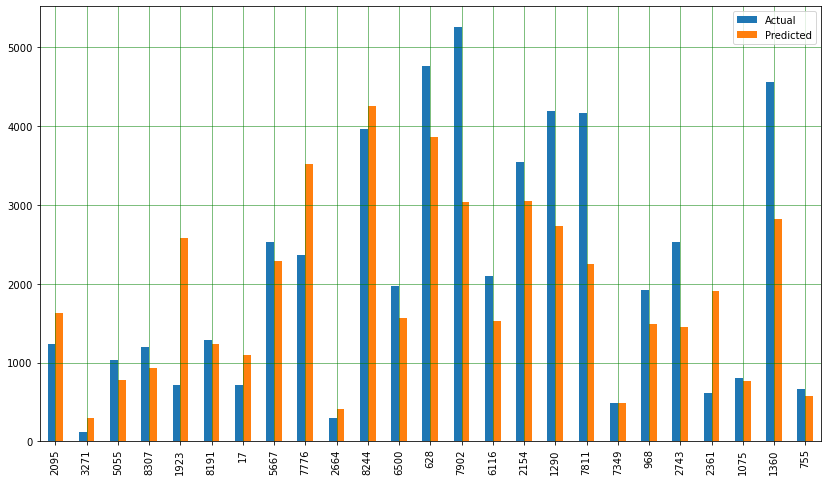

In [62]:
#Create a bar char for visualisation of results
df2 = df2.head(25)
df2.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')# display grid lines for clarity

plt.show()

## 11.3.Regularized lasso linear regression

In [63]:
from sklearn.linear_model import Lasso, Ridge

reg_lasso = Lasso(alpha=0.1)

reg_lasso.fit(X_train, Y_train)

y_pred = reg_lasso.predict(X_test)

In [64]:
reg_lasso_mse = mean_squared_error(Y_test,y_pred)

print('r2 socre = ',r2_score(Y_test,y_pred))
print('mean_sqrd_error is= ',reg_lasso_mse)
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))

r2 socre =  0.46384260523025467
mean_sqrd_error is=  1357369.5716096957
root_mean_squared error=  1165.0620462489094


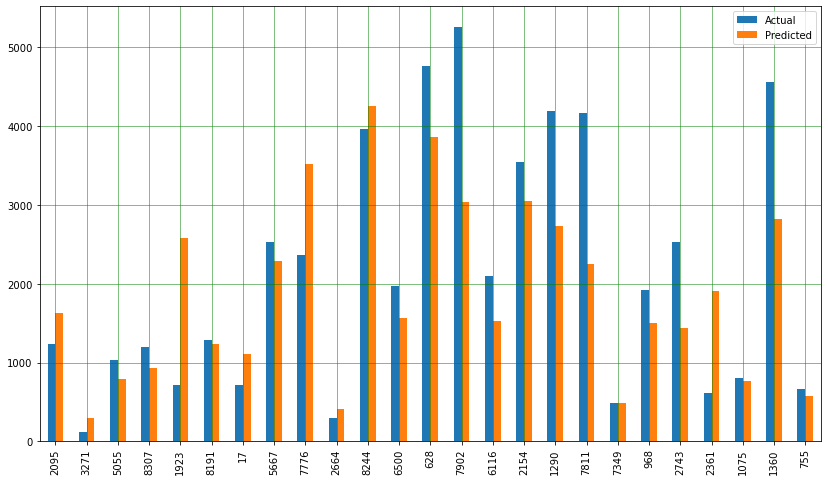

In [65]:
df3 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

df3 = df3.head(25)
df3.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')# display grid lines for clarity

plt.show()

## 11.4.Regularized ridge linear regression

In [66]:
reg_ridge = Ridge(alpha=0.1)

reg_ridge.fit(X_train, Y_train)

y_pred = reg_ridge.predict(X_test)

In [67]:
reg_ridge_mse = mean_squared_error(Y_test,y_pred)

print('r2 socre = ',r2_score(Y_test,y_pred))
print('mean_sqrd_error is= ',reg_ridge_mse)
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))

r2 socre =  0.4637550971873319
mean_sqrd_error is=  1357591.112440603
root_mean_squared error=  1165.157119207793


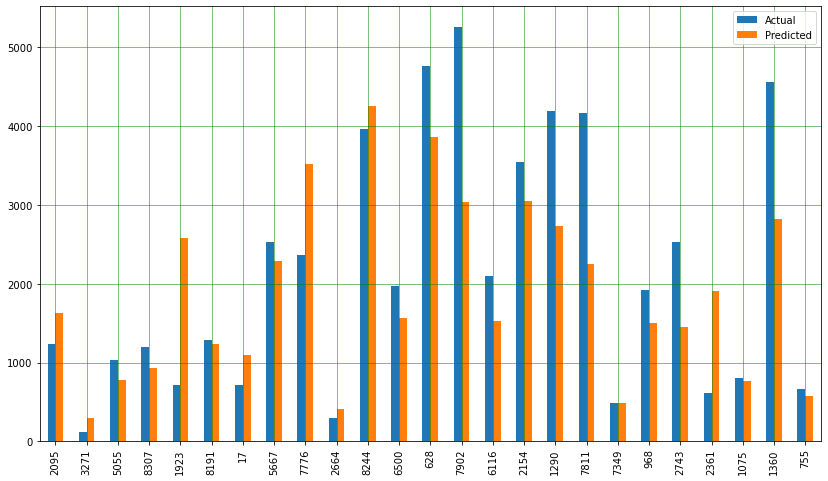

In [68]:
df4 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

df4 = df4.head(25)
df4.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')# display grid lines for clarity

plt.show()

## 11.5.Random forest for regression

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=150, max_depth=7, random_state=42)

rf_reg.fit(X_train, Y_train)

y_pred = rf_reg.predict(X_test)

In [70]:
rf_reg_mse = mean_squared_error(Y_test,y_pred)

print('r2 socre = ',r2_score(Y_test,y_pred))
print('mean_sqrd_error is= ',rf_reg_mse)
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))

r2 socre =  0.5617444563245348
mean_sqrd_error is=  1109515.1262994544
root_mean_squared error=  1053.3352392754427


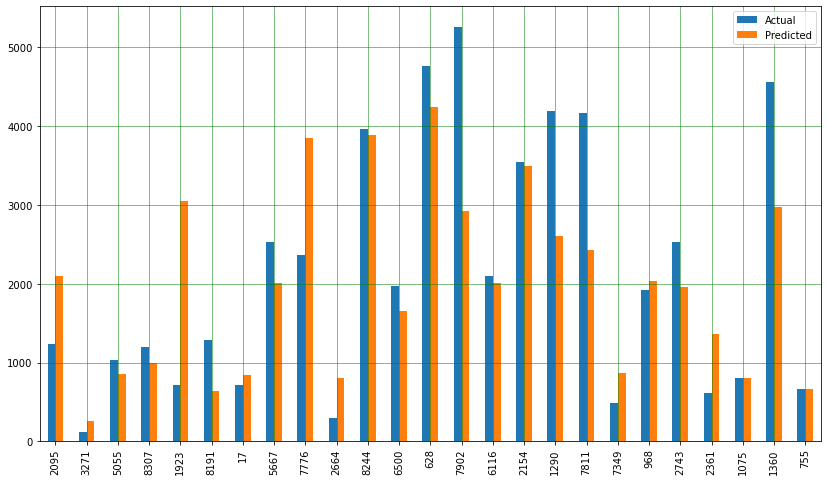

In [71]:
df5 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

df5 = df5.head(25)
df5.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')# display grid lines for clarity

plt.show()

## 11.6.XGboost 

In [72]:
!pip install xgboost
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators=150, max_depth=7, learning_rate=0.1, random_state=42)

xgb_reg.fit(X_train, Y_train)

y_pred = xgb_reg.predict(X_test)

In [73]:
xgb_reg_mse = mean_squared_error(Y_test,y_pred)

print('r2 socre = ',r2_score(Y_test,y_pred))
print('mean_sqrd_error is= ',xgb_reg_mse)
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))

r2 socre =  0.5279668874080947
mean_sqrd_error is=  1195028.5309402968
root_mean_squared error=  1093.1736051242258


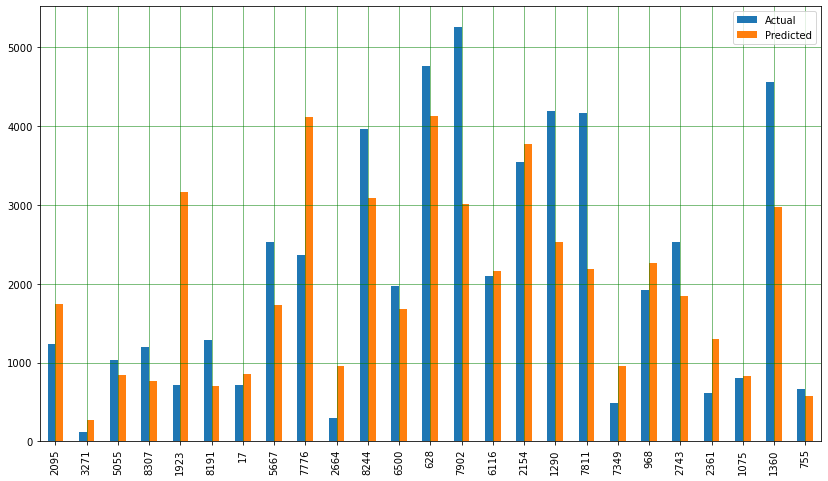

In [74]:
df6 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

df6 = df6.head(25)
df6.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')# display grid lines for clarity

plt.show()

# 12.Model selection

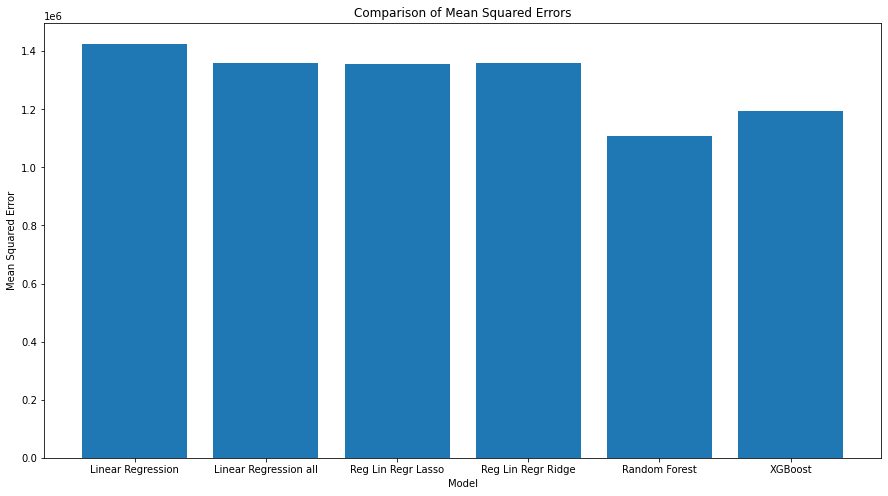

In [75]:
model_names = ['Linear Regression','Linear Regression all','Reg Lin Regr Lasso','Reg Lin Regr Ridge', 'Random Forest', 'XGBoost']
mse_values = [regr_mse, regr_all_mse, reg_lasso_mse, reg_ridge_mse, rf_reg_mse, xgb_reg_mse]
plt.figure(figsize=(15, 8))
plt.bar(model_names, mse_values)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Errors')
plt.show()

# 13.Loading testing data

In [76]:
df_test = pd.read_csv("C:\\Users\\Mazen\\Desktop\\Test.csv")
df.iloc[25:35]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
25,0.502828,0.436201,0.062038,2007,1,1,1,838.9080,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.183983,0.291246,0.046780,2004,2,1,1,1065.2800,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27,0.422447,0.084527,0.033219,1987,0,2,1,308.9312,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.081572,0.705115,0.060351,1998,1,2,0,178.4344,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.494352,0.315388,0.052443,1985,2,0,0,125.8362,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.874963,0.743902,0.104014,1998,1,2,0,163.7868,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.836261,0.352977,0.276545,2009,1,2,2,2741.7644,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.842215,0.000000,0.956616,2009,1,2,2,3068.0064,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33,0.791605,0.000000,0.262538,2002,1,1,1,2174.5028,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.770765,0.427541,0.609443,1997,2,0,1,2085.2856,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 14.Data structure and content for testing data

In [77]:
print(df_test.shape)

(5681, 11)


In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [79]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# 15. Testing data preprocessing

In [80]:
Q1 = df_test['Item_Weight'].quantile(0.25)
Q3 = df_test['Item_Weight'].quantile(0.75)
IQR = Q3 - Q1
minimum = Q1 - 2*IQR
maximum = Q3 + 2*IQR
df_test_without_outliers = df_test[(df_test['Item_Weight'] >= minimum) & (df_test['Item_Weight'] <= maximum)]
mean = df_test_without_outliers.mean()[0]
df_test['Item_Weight'] = np.where((df_test['Item_Weight'] < minimum) | (df_test['Item_Weight'] > maximum), mean, df_test['Item_Weight'])

C:\Users\Mazen\AppData\Local\Temp/ipykernel_15560/1295346043.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_test_without_outliers.mean()[0]


In [81]:
Q1 = df_test['Item_Visibility'].quantile(0.25)
Q3 = df_test['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
minimum = Q1 - 2*IQR
maximum = Q3 + 2*IQR
df_test_without_outliers = df_test[(df_test['Item_Visibility'] >= minimum) & (df_test['Item_Visibility'] <= maximum)]
mean = df_test_without_outliers.mean()[1]
df_test['Item_Visibility'] = np.where((df_test['Item_Visibility'] < minimum) | (df_test['Item_Visibility'] > maximum), mean, df_test['Item_Visibility'])

C:\Users\Mazen\AppData\Local\Temp/ipykernel_15560/3841870152.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_test_without_outliers.mean()[1]


In [82]:
Q1 = df_test['Item_MRP'].quantile(0.25)
Q3 = df_test['Item_MRP'].quantile(0.75)
IQR = Q3 - Q1
minimum = Q1 - 2*IQR
maximum = Q3 + 2*IQR
df_test_without_outliers = df_test[(df_test['Item_MRP'] >= minimum) & (df_test['Item_MRP'] <= maximum)]
mean = df_test_without_outliers.mean()[2]
df_test['Item_MRP'] = np.where((df_test['Item_MRP'] < minimum) | (df_test['Item_MRP'] > maximum), mean, df_test['Item_MRP'])

C:\Users\Mazen\AppData\Local\Temp/ipykernel_15560/744038140.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_test_without_outliers.mean()[2]


In [83]:
missing_values_count = df_test.isnull().sum()
print(missing_values_count)

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [84]:
df_test.fillna(df_test.mean(), inplace=True)

C:\Users\Mazen\AppData\Local\Temp/ipykernel_15560/3411261292.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_test.fillna(df_test.mean(), inplace=True)


In [85]:
mode_value = df_test['Outlet_Size'].mode()[0]
print(mode_value)
df_test['Outlet_Size'].fillna(value=mode_value, inplace=True)

Medium


In [86]:
missing_values_count = df_test.isnull().sum()
print(missing_values_count)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [87]:
duplicate_rows = df_test[df_test.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []


In [88]:
df_test['Item_Weight'] = (df_test['Item_Weight'] - df_test['Item_Weight'].min()) / (df_test['Item_Weight'].max() - df_test['Item_Weight'].min())
df_test['Item_Visibility'] = (df_test['Item_Visibility'] - df_test['Item_Visibility'].min()) / (df_test['Item_Visibility'].max() - df_test['Item_Visibility'].min())
df_test['Item_MRP'] = (df_test['Item_MRP'] - df_test['Item_MRP'].min()) / (df_test['Item_MRP'].max() - df_test['Item_MRP'].min())

In [89]:
columns_to_drop = ['Item_Identifier', 'Outlet_Identifier']
df_test.drop(columns_to_drop, axis=1, inplace=True)

In [90]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.964275,Low Fat,0.033460,Snack Foods,0.323413,1999,Medium,Tier 1,Supermarket Type1
1,0.222983,reg,0.169971,Dairy,0.235849,2007,Medium,Tier 2,Supermarket Type1
2,0.598095,Low Fat,0.440433,Others,0.894140,1998,Medium,Tier 3,Grocery Store
3,0.164335,Low Fat,0.068065,Snack Foods,0.524488,2007,Medium,Tier 2,Supermarket Type1
4,0.484706,Regular,0.524580,Dairy,0.862069,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,0.353974,Regular,0.059697,Snack Foods,0.466011,1997,Small,Tier 1,Supermarket Type1
5677,0.181304,Regular,0.632468,Starchy Foods,0.584637,2009,Medium,Tier 3,Supermarket Type2
5678,0.324204,Low Fat,0.325226,Health and Hygiene,0.369798,2002,Medium,Tier 2,Supermarket Type1
5679,0.639774,Regular,0.000000,Canned,0.778487,2007,Medium,Tier 2,Supermarket Type1


In [91]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

# 16. Encoding categorical variables in testing data

In [92]:
columns_to_encode = ['Item_Fat_Content', 'Item_Type']

onehot_test = OneHotEncoder(sparse=False)

onehot_test.fit(df_test[columns_to_encode])

onehot_encoded_test = onehot_test.transform(df_test[columns_to_encode])

onehot_encoded_df_test = pd.DataFrame(onehot_encoded_test, columns=onehot_test.get_feature_names(columns_to_encode))

df_test = pd.concat([df_test, onehot_encoded_df_test], axis=1)

df_test = df_test.drop(columns_to_encode, axis=1)

In [93]:
columns_to_encode = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

label_encoder_test = LabelEncoder()

df_test[columns_to_encode] = df_test[columns_to_encode].apply(label_encoder_test.fit_transform)

In [94]:
df_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.964275,0.033460,0.323413,1999,1,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.222983,0.169971,0.235849,2007,1,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.598095,0.440433,0.894140,1998,1,2,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.164335,0.068065,0.524488,2007,1,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.484706,0.524580,0.862069,1985,1,2,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.353974,0.059697,0.466011,1997,2,0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5677,0.181304,0.632468,0.584637,2009,1,2,2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5678,0.324204,0.325226,0.369798,2002,1,1,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5679,0.639774,0.000000,0.778487,2007,1,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 17. Best model deployment

In [95]:
y_pred = rf_reg.predict(df_test)
print(len(y_pred))

5681


In [96]:
y_pred = pd.DataFrame(y_pred, index=df_test.index, columns=['Predicted_Sales'])

df_test = pd.concat([df_test, y_pred], axis=1)
df_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Predicted_Sales
0,0.964275,0.033460,0.323413,1999,1,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1672.310407
1,0.222983,0.169971,0.235849,2007,1,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1353.314640
2,0.598095,0.440433,0.894140,1998,1,2,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,537.314559
3,0.164335,0.068065,0.524488,2007,1,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2448.326045
4,0.484706,0.524580,0.862069,1985,1,2,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4002.503932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.353974,0.059697,0.466011,1997,2,0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2233.862129
5677,0.181304,0.632468,0.584637,2009,1,2,2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2554.219845
5678,0.324204,0.325226,0.369798,2002,1,1,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1909.009432
5679,0.639774,0.000000,0.778487,2007,1,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3673.729218


# 18.Summary

First, I loaded the training dataset and performed some data preprocessing techniques like handling outliers, duplicates and missing values, dropping unnecessary columns, normalization and encoding all the categorical features.

second, I applied some EDA techniques including visualizations of some univarite and bivariate analyses reflecting the linear relationships between the different variables.

Third, I tried to plot heatmap for the correlation matrix of all independent variables, in order to help me explore the best features that give most information about the target column(Feature selection/Engineering).

Fourth, I created 4 ML models, Linear regression, regularized linear regression, random forest and XGboost, and fitted them on the training data and waited for them to finish and start estimating results given the validation data.

Fifth, after using some evaluation metrics like r2-score, mean squared error(mse) and root mean squared error(rmse), it turned out that Random forest is the best learning regressor.

Finally, I loaded the separate testing dataset containing no target column, hence I had to clean it all over again and apply the built Random forest model to obtain results that likely make sense.  